# *Aufgabe: Gradientenverfahren*

0. Importieren Sie alle die nötigen Bibliotheken.

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LinearRegression


1. Kopieren und visualisieren (am besten mit scatter) Sie die Daten:

In [ ]:
studying = [84, 1323, 282, 957, 1386, 810, 396, 474, 501, 660, 1260, 1005, 1110, 1290]
result = [44, 97, 30, 51, 95, 51, 44, 41, 21, 40, 90, 83, 61, 92]
plt.scatter(studying, result)
plt.title("Correlation between learn effort and test result (real data)")
plt.xlabel("Learning effort [minutes]")
plt.ylabel("Test result [points]")




2. Implementieren Sie das Gradientenverfahren für die Regressionsaufgabe. Es ist ausreichend, lineare Regression zu betrachten. 

In [63]:
from numpy import gradient

w = 1
# Anzahl der Epochen:
epoch = 500
# Learning rate:
lr = 0.00000001
#lr = 0.0000001
lrb = 0.001

# set initial value for bias:
b = 10
# Vergesses Sie nicht, den Fehler bei jeder Iteration für die Visualisierung zu speichern.

x = np.array(studying)
yExp = np.array(result)

wArrNp = np.zeros((epoch, 3)) # 0: weight, 1: bias, 2: SSE
print("wArrNp:", wArrNp)
wArrNp[0, 0] = w
wArrNp[0, 1] = b

#yCalc = x * w + b

for i in range(1, epoch):
    w = wArrNp[i - 1, 0]
    b = wArrNp[i - 1, 1]
    #print("run {}, weight w {}".format(i,w))
    #print("run {}, weight w {}, bias {}".format(i,round(w,3), round(b)))

    # calc gradient and error
    grad_w = 0
    grad_b = 0
    sse = 0

    for j in range(len(x)):
        yCalc = x[j] * w
        #yCalc = x[j] * w + b
        #print("xj: {}, yCalc: {}, yExp: {}".format(x[j], yCalc, yExp[j]) )
        grad_w += 2 * x[j] * (yCalc - yExp[j])
        grad_b += 2 * (yCalc - yExp[j])
        sse += (yCalc - yExp[j]) ** 2
    #print("run {}: weight: {}, gradient(w): {}, gradient(b) {}, SSE: {} ".format(i, round(w,3), round(grad_w,3), round(grad_b,3), round(sse,3)))
    #print("run {}: weight: {}, gradient(w): {}, SSE: {} ".format(i, w, grad_w, sse))

    # store SSE
    wArrNp[i-1,2] = sse

    # calc. next w,b:
    wArrNp[i, 0] = w - lr * grad_w
    wArrNp[i, 1] = b - lrb * grad_b

#print("weight")


wArrNp: [[0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 ...
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]]


In [ ]:
#np.gradient?
#plt?
np.zeros?


3. Visualisieren Sie den Fehler: 

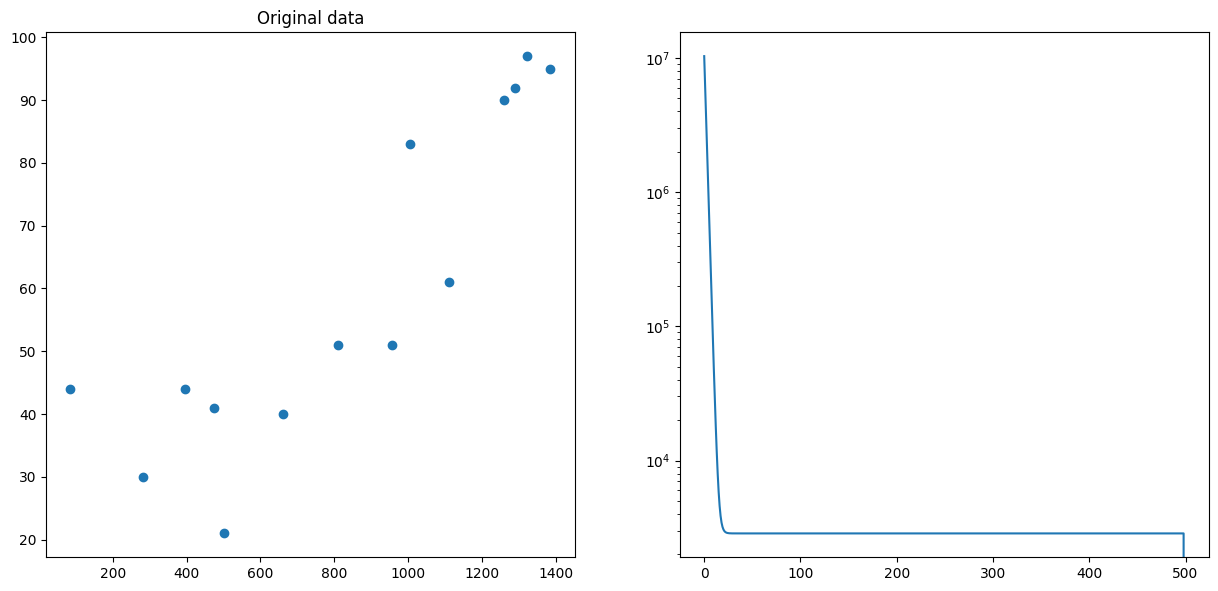

In [64]:
fig = plt.figure(figsize=(15, 15))
ax = fig.add_subplot(2, 2, 1)
ax.set_title("Original data")
ax.scatter(studying, result)

ax = fig.add_subplot(2, 2, 2)

errVect = wArrNp[:, 2]
# print(errVect)
ax.plot(range(epoch), errVect)
ax.set_yscale("log")


# now, let's calculate for all values


Zusatzaufgabe 1. Implementieren Sie ein Momentum für Ihr Gradientenverfahren

Zusatzaufgabe 2: Wiederholen Sie den Schritt 2 für die Logistische Regression. 